In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import keras
import json
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog

from tensorflow.keras import backend as K

In [3]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [6]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


In [7]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape


(3264, 150, 150, 3)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [14]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 513s 6s/step - loss: 1.0196 - accuracy: 0.5547 - val_loss: 0.9858 - val_accuracy: 0.5646
Epoch 2/20
83/83 [==============================] - 510s 6s/step - loss: 0.8946 - accuracy: 0.6213 - val_loss: 0.8447 - val_accuracy: 0.6088
Epoch 3/20
83/83 [==============================] - 506s 6s/step - loss: 0.7600 - accuracy: 0.6916 - val_loss: 0.8081 - val_accuracy: 0.6667
Epoch 4/20
83/83 [==============================] - 504s 6s/step - loss: 0.6329 - accuracy: 0.7465 - val_loss: 0.6484 - val_accuracy: 0.7551
Epoch 5/20
83/83 [==============================] - 506s 6s/step - loss: 0.5394 - accuracy: 0.7953 - val_loss: 0.5167 - val_accuracy: 0.8197
Epoch 6/20
83/83 [==============================] - 497s 6s/step - loss: 0.4545 - accuracy: 0.8301 - val_loss: 0.4791 - val_accuracy: 0.8197
Epoch 7/20
83/83 [==============================] - 495s 6s/step - loss: 0.3944 - accuracy: 0.8528 - val_loss: 0.5654 - val_accuracy: 0.7755
Epoch 8/20
83

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

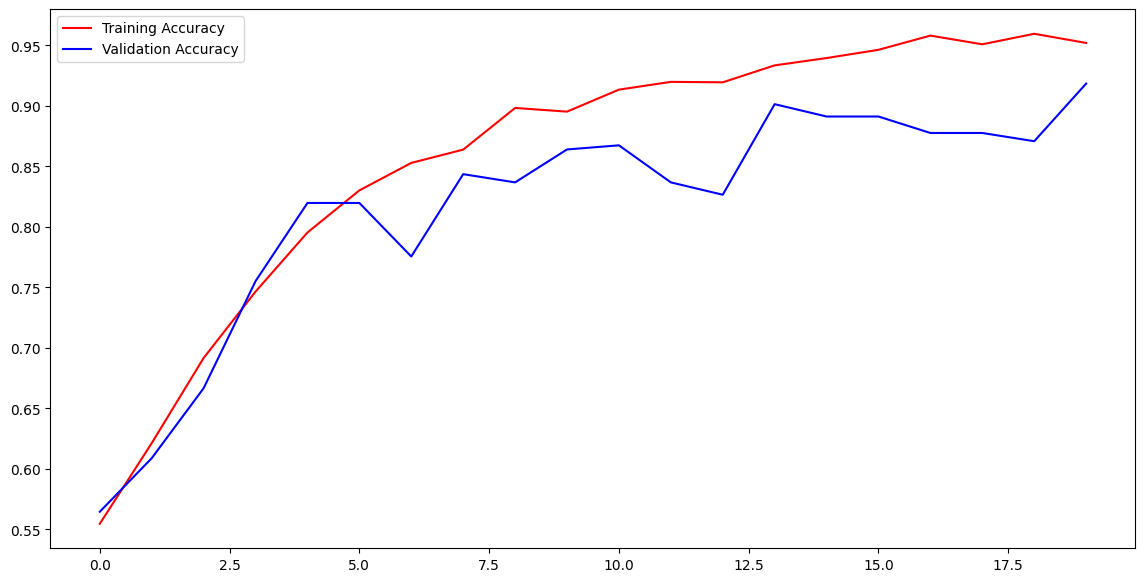

In [16]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

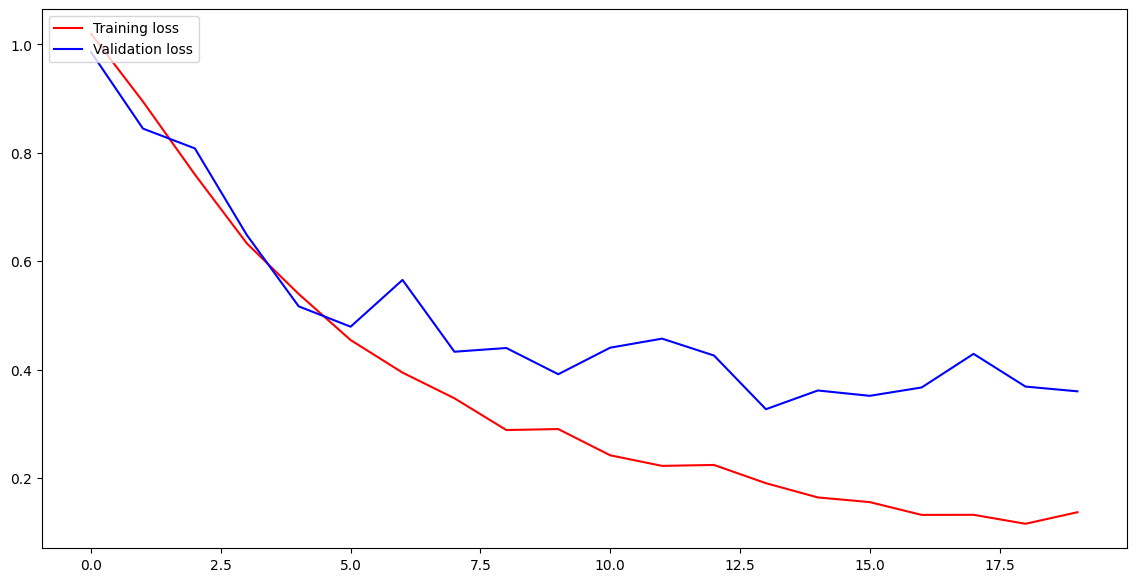

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [20]:
img = cv2.imread('/content/drive/MyDrive/Training/pituitary_tumor/p (1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [21]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

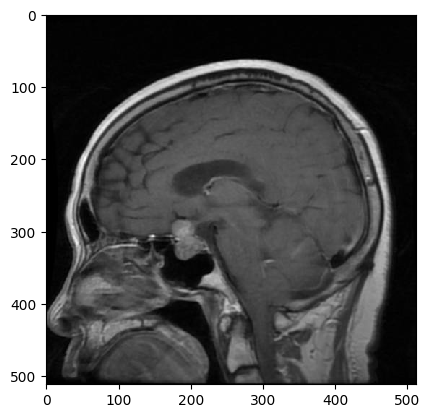

In [22]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Training/pituitary_tumor/p (223).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [23]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 1s 543ms/step


3

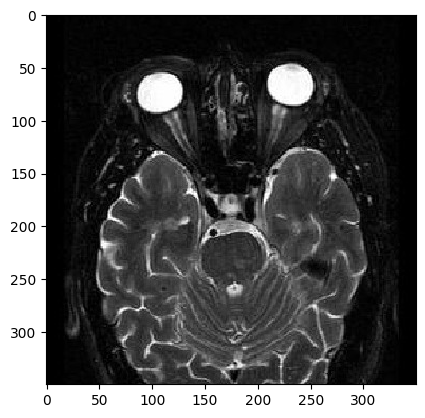

1/1 [==============================] - 0s 72ms/step


2

In [39]:
img = cv2.imread('/content/drive/MyDrive/Training/no_tumor/2.jpg')
img = cv2.resize(img, (150, 150))
img_array = np.array(img)
img_array = img_array.reshape(1, 150, 150, 3)

from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/Training/no_tumor/2.jpg'
img = image.load_img(img_path)
plt.imshow(img, interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
